In [85]:
# Generic Imports
import numpy as np 
from PIL import Image 
import scipy.io as sio
import matplotlib.pyplot as plt

In [86]:
# Generic Imports
from enum import StrEnum # Enum Implementation for Robustness

class Categories(StrEnum):
    Car = "Car"
    Duck = "Duck"
    Face = "Face"
    Motorbike = "Motorbike"
    Winebottle = "Winebottle"

In [87]:
# Generic Imports
import glob # For searching files
import os # To remove file extension

# Constants
DATA_PATH: str = "./../data/WillowObject/WILLOW-ObjectClass/"

# 1. Gets Information
def getting(cat: Categories, n: int) -> list[tuple[Image.Image, np.array]]:
    images: list[str] = glob.glob(f"{DATA_PATH}{cat.value}/*.png")
    points: list[str] = glob.glob(f"{DATA_PATH}{cat.value}/*.mat")
    pairs = []
    set_points = set(points)

    for img_file in images:
        base, _ = os.path.splitext(img_file)
        mat_file = base + ".mat"
        if mat_file in set_points:
            img = Image.open(img_file)
            kps = np.array(sio.loadmat(mat_file)['pts_coord'])
            pairs.append((img, kps))
            if len(pairs) >= n:
                break

    return pairs

In [88]:
# Constants
RESIZE: int = 256
# 2. Resizes Values
def resizing(tup: tuple[Image.Image, np.array]) -> tuple[Image.Image, np.array]:
    img, kps = tup
    kps[0] *= RESIZE / img.size[0]
    kps[1] *= RESIZE / img.size[1]

    img = img.resize((RESIZE, RESIZE), resample=Image.BILINEAR)

    return (img, kps)

In [89]:
# Geneirc Imports
import math
def plotting(pair: tuple[Image, np.array]) -> None:
    plt.imshow(pair[0])
    plt.scatter(pair[1][0], pair[1][1], c='w', edgecolors='k')

def visualize(imgs: list[tuple[Image.Image, np.array]]):
    n = len(imgs)
    if n > 1:
        width = 8
        cols = 2
    else:
        width = 4
        cols = 1
    rows = math.ceil(n / cols)
    height = rows * 4
    
    plt.figure(figsize=(width, height))
    for i, img in enumerate(imgs):
        plt.subplot(rows, cols, i +1)
        plotting(img)

In [90]:
# The Main Function
def show(cat: Categories, n: int = 4):
    pairs = getting(cat, n) # Gets
    pairs = [resizing(p) for p in pairs] # Resizes
    visualize(pairs) # And plots

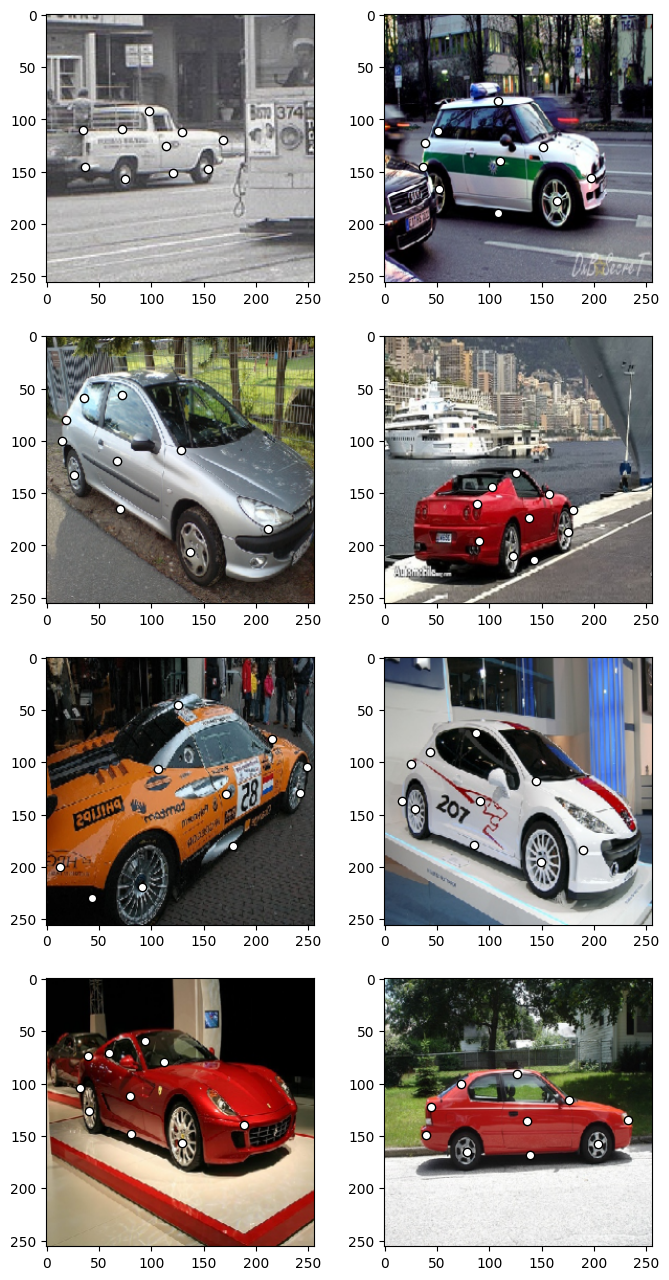

In [91]:
# 3.3.2.1 Exercise 1
show(Categories.Car, 8)

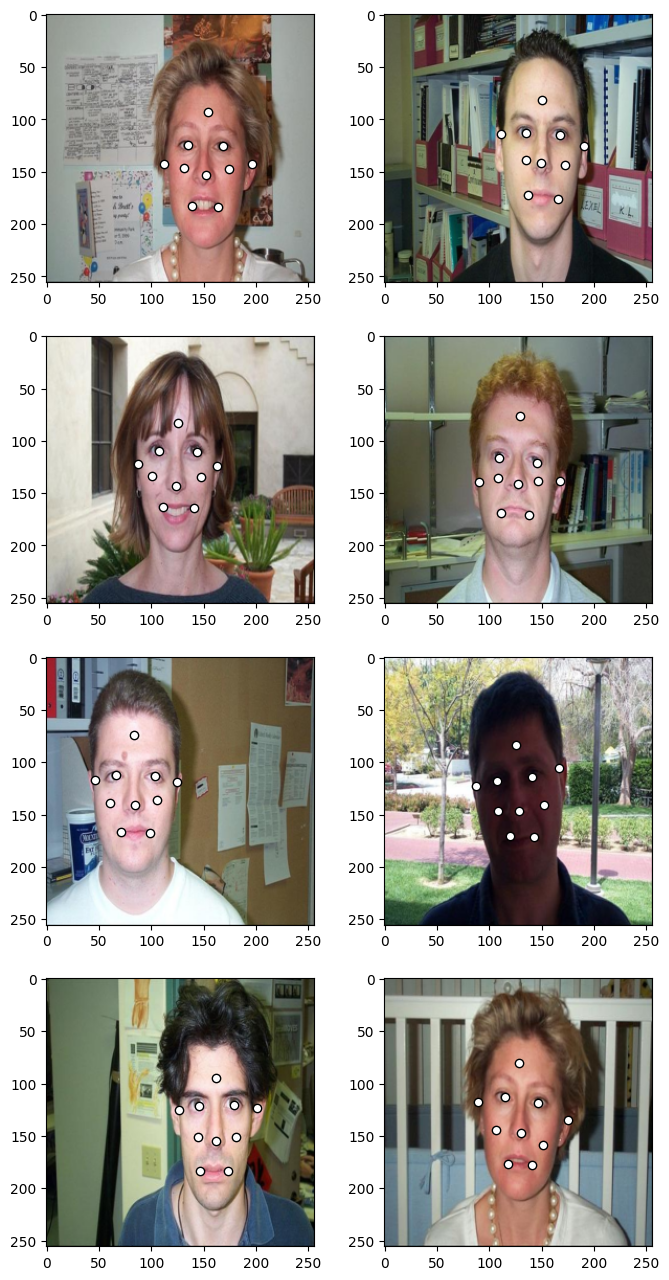

In [92]:
# 3.3.2.2 Exercise 2
show(Categories.Face, 8)

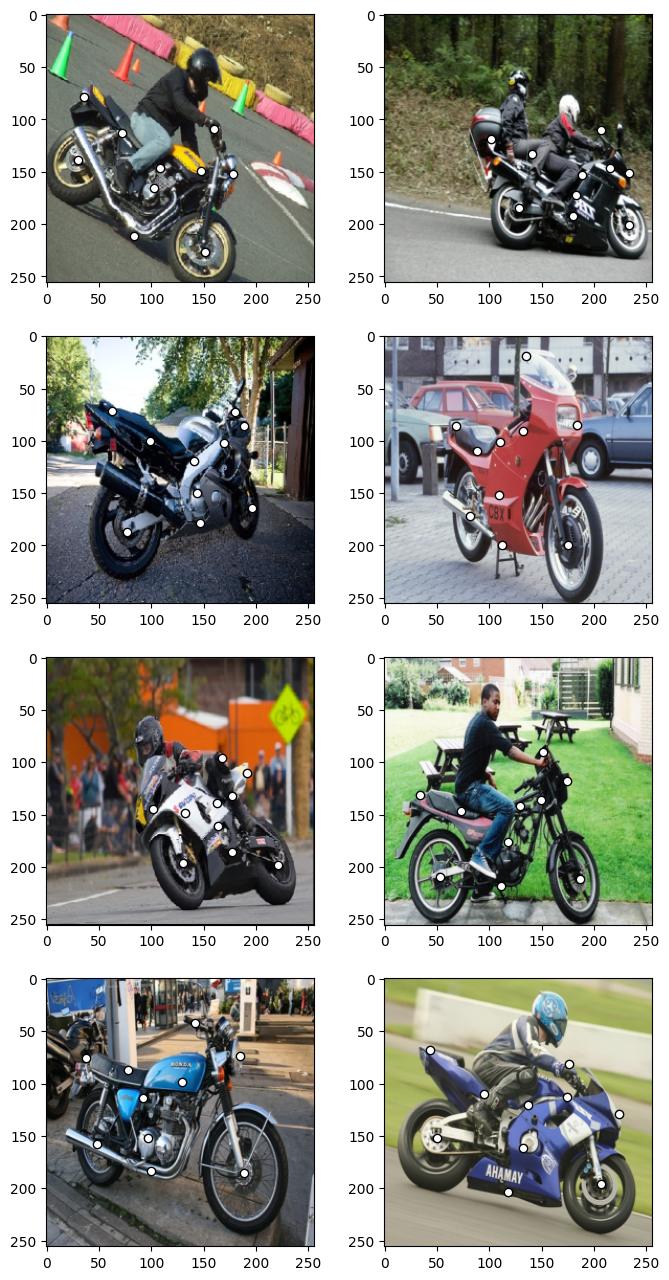

In [93]:
# 3.3.2.3 Exercise 3
show(Categories.Motorbike, 8)

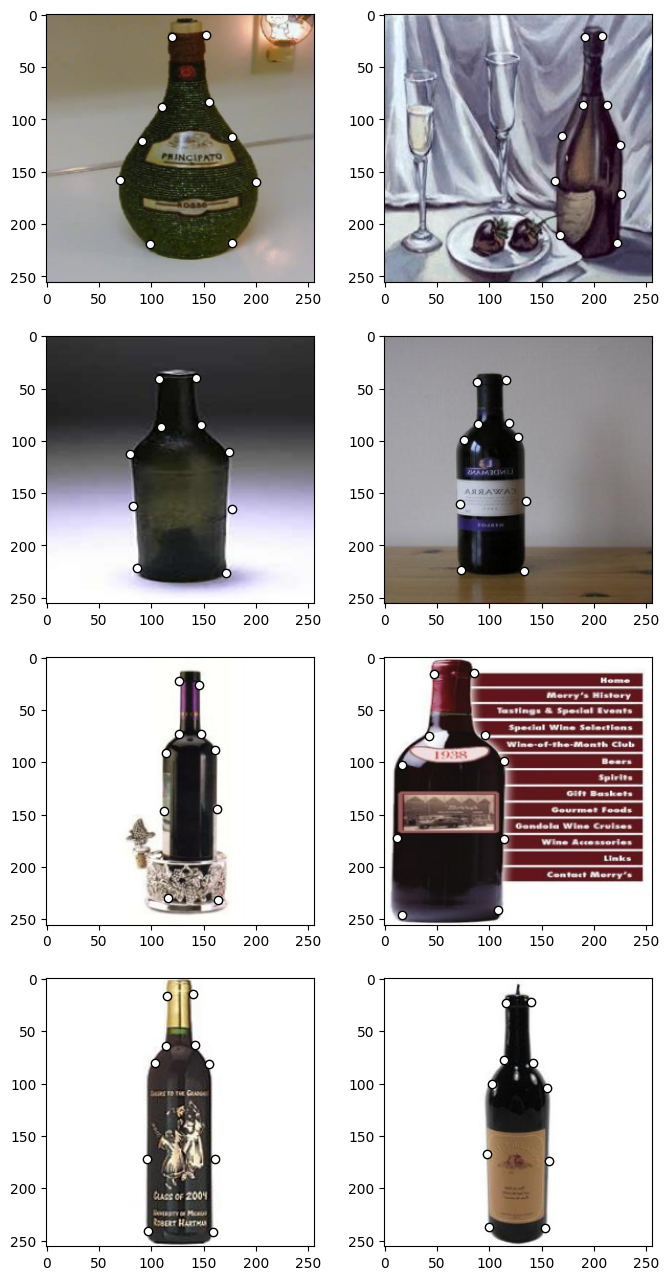

In [94]:
# 3.3.2.3 Exercise 4 
show(Categories.Winebottle, 8)

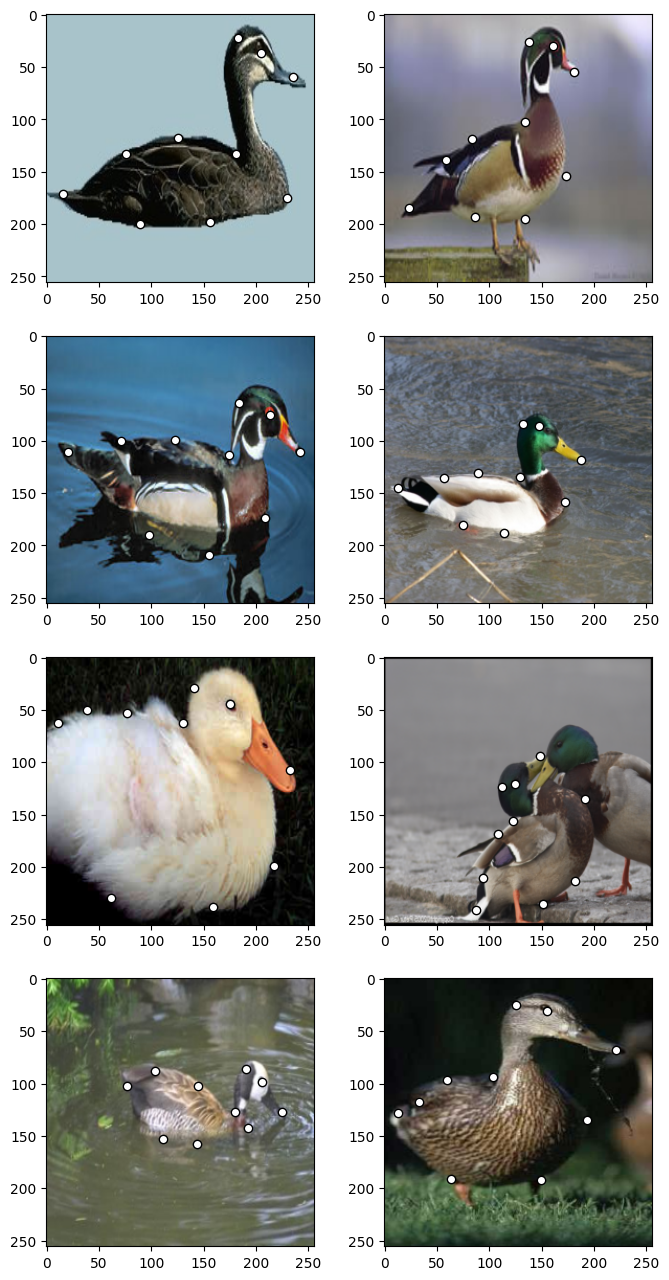

In [96]:
# 3.3.2.5 EXTRA
show(Categories.Duck, 8)